In [1]:
import sys
sys.path.append("..")
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import os
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()
import snscrape
import snscrape.modules.twitter as sntwitter
import radar.utils.config as config
import radar.utils.logger as logger
import radar.scrape_tweets.pipeline as scraper
import radar.text_cleaning.pipeline as text_clean
import radar.topic_modelling.pipeline as topic_model

INFO:radar.utils.logger:loaded config and parameters.
[nltk_data] Downloading package punkt to /Users/anand_k/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anand_k/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/anand_k/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/anand_k/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to /Users/anand_k/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/anand_k/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# SCRAPE TWEETS

In [3]:
twitter_df = scraper.scrapper.instantiate_from_twitter() 

# CLEAN TEXTS

In [4]:
clean_df = text_clean.text_cleaner.clean_text()

[nltk_data] Downloading package punkt to /Users/anand_k/nltk_data...
[nltk_data] Downloading package punkt to /Users/anand_k/nltk_data...
[nltk_data] Downloading package punkt to /Users/anand_k/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anand_k/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/anand_k/nltk_data...
[nltk_data] Downloading package punkt to /Users/anand_k/nltk_data...
[nltk_data] Downloading package punkt to /Users/anand_k/nltk_data...
[nltk_data] Downloading package punkt to /Users/anand_k/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anand_k/nltk_data...
[nltk_data]   Package stopwords is already up-to-date![nltk_data]   Package wordnet is already up-to-date!

[nltk_data] Downloading package wordnet to /Users/anand_k/nltk_data...
[

# TOPIC MODELLING

In [5]:
topic_words = topic_model.topic_model.topic_modeller_daily_report(clean_df.df)

INFO:radar.utils.logger:loaded config and parameters.
INFO:radar.utils.logger:loaded config and parameters.
INFO:radar.utils.logger:loaded config and parameters.
INFO:radar.utils.logger:loaded config and parameters.
INFO:radar.utils.logger:loaded config and parameters.
INFO:radar.utils.logger:loaded config and parameters.
INFO:radar.utils.logger:loaded config and parameters.
INFO:radar.utils.logger:loaded config and parameters.
INFO:radar.utils.logger:loaded config and parameters.
INFO:radar.utils.logger:loaded config and parameters.
[nltk_data] Downloading package punkt to /Users/anand_k/nltk_data...
[nltk_data] Downloading package punkt to /Users/anand_k/nltk_data...
[nltk_data] Downloading package punkt to /Users/anand_k/nltk_data...
[nltk_data] Downloading package punkt to /Users/anand_k/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anand_k/nltk_data...
[nltk_data]   Package stopwords is already u

# GENERATE ENTITY DASHBOARD DATA

In [4]:
topic_cat_df = topic_model.entity_dashboard.generate_topic_cat(clean_df.df)

INFO:radar.utils.logger:loaded config and parameters.
INFO:radar.utils.logger:loaded config and parameters.
INFO:radar.utils.logger:loaded config and parameters.
INFO:radar.utils.logger:loaded config and parameters.
INFO:radar.utils.logger:loaded config and parameters.
INFO:radar.utils.logger:loaded config and parameters.
INFO:radar.utils.logger:loaded config and parameters.
INFO:radar.utils.logger:loaded config and parameters.
INFO:radar.utils.logger:loaded config and parameters.
INFO:radar.utils.logger:loaded config and parameters.
[nltk_data] Downloading package punkt to /Users/anand_k/nltk_data...
[nltk_data] Downloading package punkt to /Users/anand_k/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anand_k/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anand_k/nltk_data...
[nltk_data] Downloading package punkt to /

In [4]:
topic_neg_df = topic_model.entity_dashboard.generate_neg_cat(clean_df.df)

INFO:radar.utils.logger: name : twitter data neg words for entity dashboard generated, data shape: (472047, 23)               date                           entity    signal      macd  \
0       2022-01-06    Paytm Payments Bank2022-01-06 -0.018282 -0.014468   
1       2022-01-06    Paytm Payments Bank2022-01-06 -0.018282 -0.014468   
2       2022-01-06    Paytm Payments Bank2022-01-06 -0.018282 -0.014468   
3       2022-01-06    Paytm Payments Bank2022-01-06 -0.018282 -0.014468   
4       2022-01-06    Paytm Payments Bank2022-01-06 -0.018282 -0.014468   
...            ...                              ...       ...       ...   
472042  2022-12-14  UJJIVAN SMALL FINANCE2022-12-14 -0.001662  0.048567   
472043  2022-12-14  UJJIVAN SMALL FINANCE2022-12-14 -0.001662  0.048567   
472044  2022-12-14  UJJIVAN SMALL FINANCE2022-12-14 -0.001662  0.048567   
472045  2022-12-14  UJJIVAN SMALL FINANCE2022-12-14 -0.001662  0.048567   
472046  2022-12-14  UJJIVAN SMALL FINANCE2022-12-14 -0.001662  

# PLOT CODE

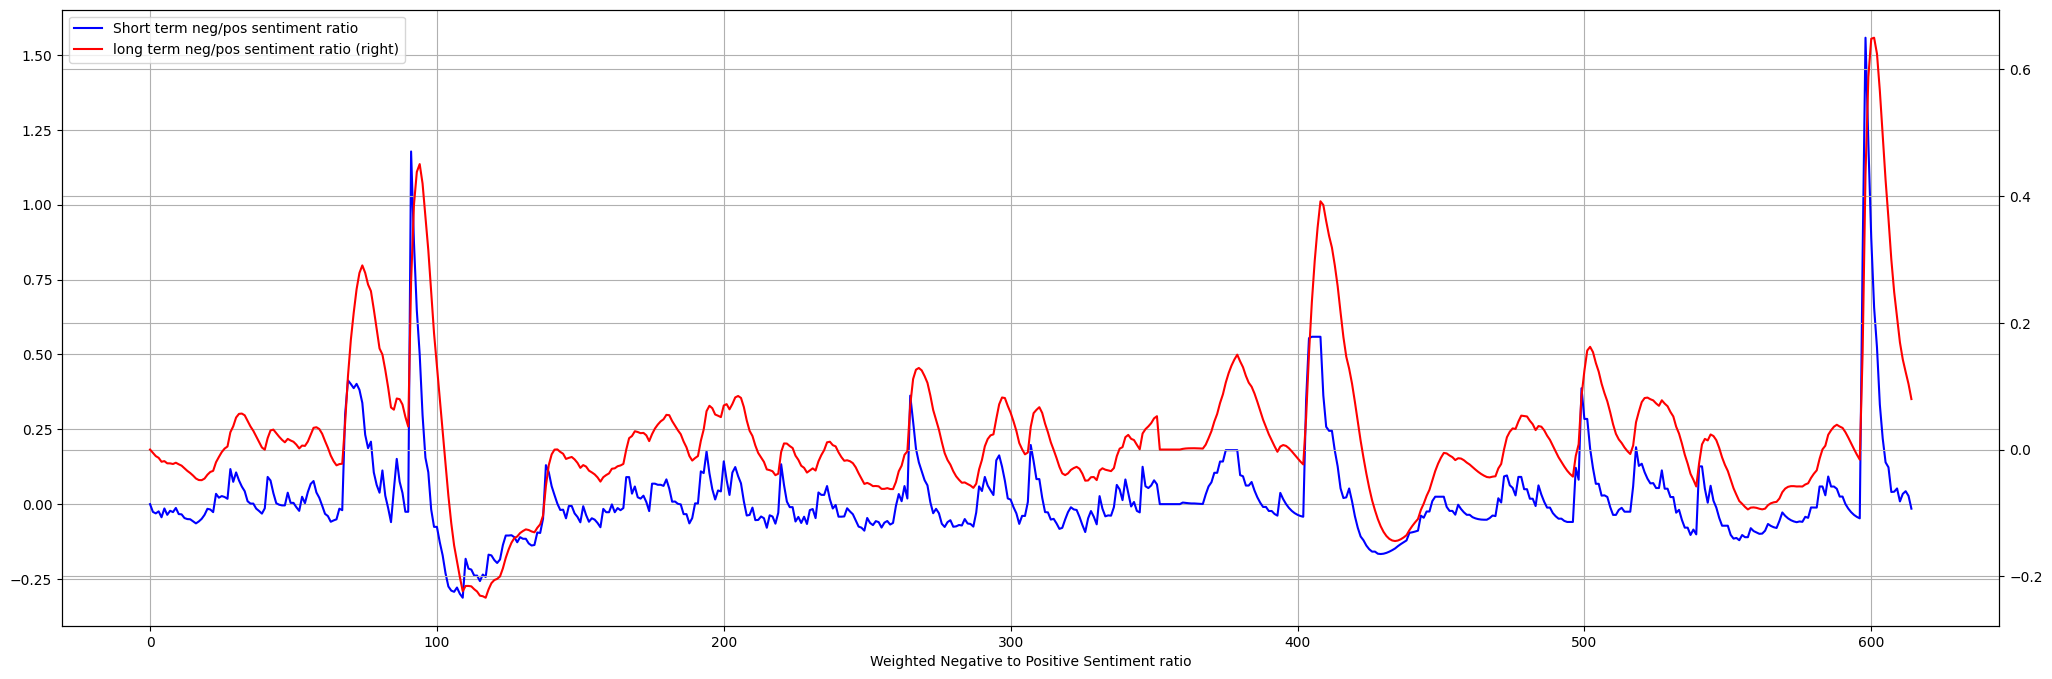

In [6]:
# Plotting tools
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(25,8))
plt.xlabel('Weighted Negative to Positive Sentiment ratio')

ax1 = topic_words.df.macd.plot(color='blue', grid=True, label='Short term neg/pos sentiment ratio')
ax2 = topic_words.df.signal.plot(color='red', grid=True, secondary_y=True, label='long term neg/pos sentiment ratio')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()